In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("/kaggle/input/srilankan-vehicles-sales/car_price_dataset.csv")
print(df.columns)
df.head()


Index(['Unnamed: 0', 'Brand', 'Model', 'YOM', 'Engine (cc)', 'Gear',
       'Fuel Type', 'Millage(KM)', 'Town', 'Date', 'Leasing', 'Condition',
       'AIR CONDITION', 'POWER STEERING', 'POWER MIRROR', 'POWER WINDOW',
       'Price'],
      dtype='object')


,Unnamed: 0,Brand,Model,YOM,Engine (cc),Gear,Fuel Type,Millage(KM),Town,Date,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price
0,0,AUDI,A1,2016,990.0,Automatic,Petrol,99000.0,Gampaha,2025-02-05,No Leasing,USED,Available,Available,Available,Available,100.0
1,1,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,2025-01-14,No Leasing,USED,Available,Available,Available,Available,97.0
2,2,AUDI,A1,2018,1000.0,Automatic,Petrol,77000.0,Dehiwala-Mount-Lavinia,2025-01-23,No Leasing,USED,Available,Available,Available,Available,98.5
3,3,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Negombo,2024-12-21,No Leasing,USED,Available,Available,Available,Available,107.0
4,4,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,2024-12-21,No Leasing,USED,Available,Available,Available,Available,99.5


In [16]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("Missing Date rows:", df['Date'].isna().sum())

df = df.dropna(subset=['Date']).copy()
df = df.set_index('Date')
df.head()


Missing Date rows: 0


,Unnamed: 0,Brand,Model,YOM,Engine (cc),Gear,Fuel Type,Millage(KM),Town,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price
Date,,,,,,,,,,,,,,,,
2025-02-05,0,AUDI,A1,2016,990.0,Automatic,Petrol,99000.0,Gampaha,No Leasing,USED,Available,Available,Available,Available,100.0
2025-01-14,1,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,No Leasing,USED,Available,Available,Available,Available,97.0
2025-01-23,2,AUDI,A1,2018,1000.0,Automatic,Petrol,77000.0,Dehiwala-Mount-Lavinia,No Leasing,USED,Available,Available,Available,Available,98.5
2024-12-21,3,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Negombo,No Leasing,USED,Available,Available,Available,Available,107.0
2024-12-21,4,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,No Leasing,USED,Available,Available,Available,Available,99.5


In [9]:
import os

os.listdir("/kaggle/input/srilankan-vehicles-sales")


['car_price_dataset.csv']

In [17]:
daily_series = df['Price'].resample('D').mean().dropna()
daily_series.head()


Date
2024-12-03    58.000000
2024-12-04    55.133805
2024-12-05    54.512522
2024-12-06    43.640037
2024-12-07    52.937254
Freq: D, Name: Price, dtype: float64

In [18]:
print(df.columns.tolist())


['Unnamed: 0', 'Brand', 'Model', 'YOM', 'Engine (cc)', 'Gear', 'Fuel Type', 'Millage(KM)', 'Town', 'Leasing', 'Condition', 'AIR CONDITION', 'POWER STEERING', 'POWER MIRROR', 'POWER WINDOW', 'Price']


In [21]:
df = df.drop(columns=['Unnamed: 0'])
df.head()


,Brand,Model,YOM,Engine (cc),Gear,Fuel Type,Millage(KM),Town,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price
Date,,,,,,,,,,,,,,,
2025-02-05,AUDI,A1,2016,990.0,Automatic,Petrol,99000.0,Gampaha,No Leasing,USED,Available,Available,Available,Available,100.0
2025-01-14,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,No Leasing,USED,Available,Available,Available,Available,97.0
2025-01-23,AUDI,A1,2018,1000.0,Automatic,Petrol,77000.0,Dehiwala-Mount-Lavinia,No Leasing,USED,Available,Available,Available,Available,98.5
2024-12-21,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Negombo,No Leasing,USED,Available,Available,Available,Available,107.0
2024-12-21,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,No Leasing,USED,Available,Available,Available,Available,99.5


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Brand'] = le.fit_transform(df['Brand'])
df['Fuel Type'] = le.fit_transform(df['Fuel Type'])
df['Gear'] = le.fit_transform(df['Gear'])


In [28]:
df = df.rename(columns={'Milage(KM)': 'Mileage_KM'})


In [31]:
import pandas as pd

df = pd.read_csv("/kaggle/input/srilankan-vehicles-sales/car_price_dataset.csv")
print(df.columns.tolist())


['Unnamed: 0', 'Brand', 'Model', 'YOM', 'Engine (cc)', 'Gear', 'Fuel Type', 'Millage(KM)', 'Town', 'Date', 'Leasing', 'Condition', 'AIR CONDITION', 'POWER STEERING', 'POWER MIRROR', 'POWER WINDOW', 'Price']


In [32]:
# remove hidden spaces just in case
df.columns = df.columns.str.strip()

# rename correctly
df = df.rename(columns={'Milage(KM)': 'Mileage_KM'})

print(df.columns.tolist())


['Unnamed: 0', 'Brand', 'Model', 'YOM', 'Engine (cc)', 'Gear', 'Fuel Type', 'Millage(KM)', 'Town', 'Date', 'Leasing', 'Condition', 'AIR CONDITION', 'POWER STEERING', 'POWER MIRROR', 'POWER WINDOW', 'Price']


In [34]:
# force rename mileage column (safe method)
for col in df.columns:
    if 'Milage' in col:
        df = df.rename(columns={col: 'Mileage_KM'})

print(df.columns.tolist())


['Unnamed: 0', 'Brand', 'Model', 'YOM', 'Engine (cc)', 'Gear', 'Fuel Type', 'Millage(KM)', 'Town', 'Date', 'Leasing', 'Condition', 'AIR CONDITION', 'POWER STEERING', 'POWER MIRROR', 'POWER WINDOW', 'Price']


In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("/kaggle/input/srilankan-vehicles-sales/car_price_dataset.csv")

# clean column names
df.columns = df.columns.str.strip()

# detect mileage column (handles Milage / Mileage / Millage)
mileage_col = None
for c in df.columns:
    if ("Milage" in c) or ("Mileage" in c) or ("Millage" in c):
        mileage_col = c
        break

print("Detected mileage column:", mileage_col)

# rename
df = df.rename(columns={mileage_col: "Mileage_KM"})

# encode Brand
le = LabelEncoder()
df["Brand"] = le.fit_transform(df["Brand"])

# features & target
X = df[["Brand", "YOM", "Mileage_KM", "Engine (cc)"]]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("R² Score:", model.score(X_test, y_test))


Detected mileage column: Millage(KM)
R² Score: 0.4699635469611423


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE :", mae)
print("RMSE:", rmse)


MAE : 19.697093549918925
RMSE: 30.84169338094204


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("/kaggle/input/srilankan-vehicles-sales/car_price_dataset.csv")
df.columns = df.columns.str.strip()

# detect mileage column
mileage_col = None
for c in df.columns:
    if ("Milage" in c) or ("Mileage" in c) or ("Millage" in c):
        mileage_col = c
        break

df = df.rename(columns={mileage_col: "Mileage_KM"})

# features
features = ["Brand", "Model", "YOM", "Engine (cc)", "Gear", "Fuel Type", "Town", "Mileage_KM"]
target = "Price"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_cols = ["Brand", "Model", "Gear", "Fuel Type", "Town"]
num_cols = ["YOM", "Engine (cc)", "Mileage_KM"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

model_rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

pipe = Pipeline(steps=[("prep", preprocess), ("model", model_rf)])
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("RandomForest Results")
print("R2  :", r2)
print("MAE :", mae)
print("RMSE:", rmse)


RandomForest Results
R2  : 0.9088451336397139
MAE : 4.696863896771239
RMSE: 12.790139316212791


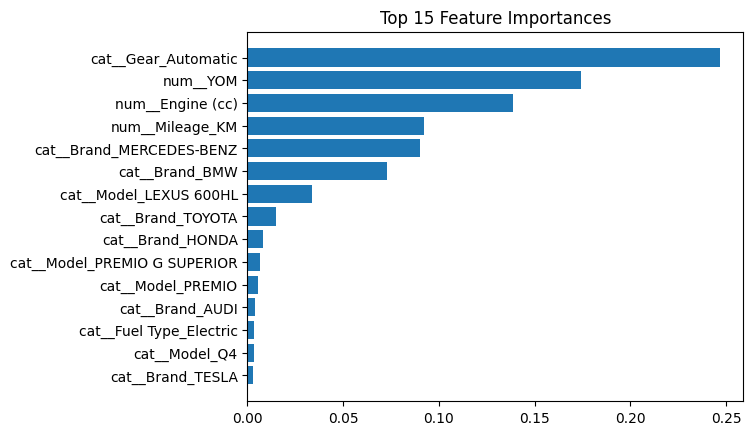

In [40]:
import matplotlib.pyplot as plt

importances = pipe.named_steps["model"].feature_importances_
feature_names = pipe.named_steps["prep"].get_feature_names_out()

indices = np.argsort(importances)[-15:]

plt.figure()
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.title("Top 15 Feature Importances")
plt.show()


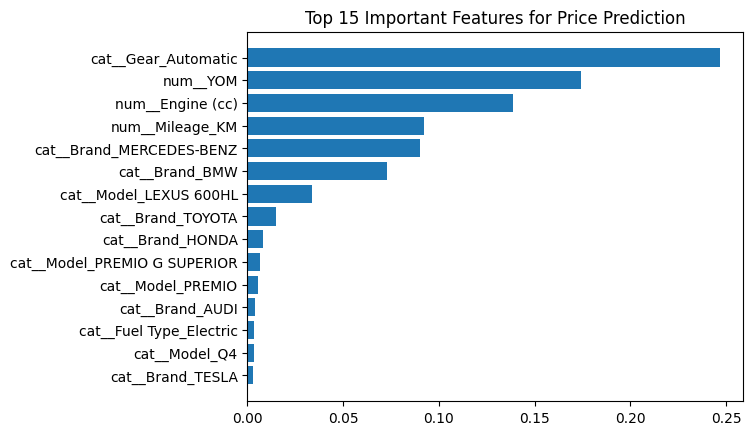

In [41]:
import matplotlib.pyplot as plt
import numpy as np

importances = pipe.named_steps["model"].feature_importances_
feature_names = pipe.named_steps["prep"].get_feature_names_out()

top_idx = np.argsort(importances)[-15:]

plt.figure()
plt.barh(range(len(top_idx)), importances[top_idx])
plt.yticks(range(len(top_idx)), feature_names[top_idx])
plt.title("Top 15 Important Features for Price Prediction")
plt.show()
